In [30]:
from numpy import *
import pandas as pd
from PIL import Image
from copy import *


In [31]:
pixels_dict = {}
readRGB = []
solvedCat = []
def readGraynne(image_name):
    img = Image.open(image_name, 'r').convert('I')
    data = asarray(img)
    return data


def fiveUp(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*5):
        diff[i] = nan
    for i in range(1024*5, len(readRGB)):
        diff[i] =  readRGB[i] - readRGB[i - 5*1024]

    return diff

def fiveDown(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*(1024-5)):
        diff[i] = readRGB[i] - readRGB[i + 5*1024]
    for i in range(1024*(1024-5), len(readRGB)):
        diff[i] = nan

    return diff

def fiveRight(readRGB):
    diff = empty(len(readRGB))
    for i in range(len(readRGB)):
        if (i % 1024 < 1019):
            diff[i] = readRGB[i] - readRGB[i + 5]
        else:
            diff[i] = nan

    return diff

def fiveLeft(readRGB):
    diff = empty(len(readRGB))
    for i in range(len(readRGB)):
        if (i % 1024 > 4):
            diff[i] = readRGB[i] - readRGB[i - 5]
        else:
            diff[i] = nan

    return diff

def tenUp(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*10):
        diff[i] = nan
    for i in range(1024*10, len(readRGB)):
        diff[i] =  readRGB[i] - readRGB[i - 10*1024]

    return diff

def tenDown(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*(1024-10)):
        diff[i] = readRGB[i] - readRGB[i + 10*1024]
    for i in range(1024*(1024-10), len(readRGB)):
        diff[i] = nan

    return diff

def tenRight(readRGB):
    diff = empty(len(readRGB))
    for i in range(len(readRGB)):
        if (i % 1024 < 1014):
            diff[i] = readRGB[i] - readRGB[i + 10]
        else:
            diff[i] = nan

    return diff

def tenLeft(readRGB):
    diff = empty(len(readRGB))
    for i in range(len(readRGB)):
        if (i % 1024 > 9):
            diff[i] = readRGB[i] - readRGB[i - 10]
        else:
            diff[i] = nan

    return diff

def fiveUpRight(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*5):
        diff[i] = 0
    for i in range(1024*5, len(readRGB)):
            if (i % 1024 < 1019):
                diff[i] =  readRGB[i] - readRGB[i - 5*1024 + 5]
            else:
                diff[i] = 0

    return diff

def fiveUpLeft(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*5):
        diff[i] = 0
    for i in range(1024*5, len(readRGB)):
        if (i % 1024 > 4):
            diff[i] =  readRGB[i] - readRGB[i - 5*1024 - 5]
        else:
            diff[i] = 0

    return diff
'''
def fiveDownRight(readRGB):
    diff = empty(len(readRGB))
        
    for i in range(1024*(1024-5)):
        if (i % 1024 < 1019):
            diff[i] =  readRGB[i] - readRGB[i + 5*1024 + 5]
        else:
            diff[i] = 0
    for i in range(1024*(1024-5), len(readRGB)):
        diff[i] = 0

    return diff

def fiveDownLeft(readRGB):
    diff = empty(len(readRGB))

    for i in range(1024*(1024-5)):
        if (i % 1024 > 4):
            diff[i] =  readRGB[i] - readRGB[i + 5*1024 - 5]
        else:
            diff[i] = 0
            
    for i in range(1024*(1024-5), len(readRGB)):
        diff[i] = 0
            

    return diff
'''
def tenUpRight(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*10):
        diff[i] = 0
    for i in range(1024*10, len(readRGB)):
            if (i % 1024 < 1014):
                diff[i] =  readRGB[i] - readRGB[i - 10*1024 + 10]
            else:
                diff[i] = 0

    return diff

def tenUpLeft(readRGB):
    diff = empty(len(readRGB))
    for i in range(1024*10):
        diff[i] = 0
    for i in range(1024*10, len(readRGB)):
        if (i % 1024 > 9):
            diff[i] =  readRGB[i] - readRGB[i - 10*1024 - 10]
        else:
            diff[i] = 0

    return diff
'''
def tenDownRight(readRGB):
    diff = empty(len(readRGB))
        
    for i in range(1024*(1024-10)):
        if (i % 1024 < 1014):
            diff[i] =  readRGB[i] - readRGB[i + 10*1024 + 10]
        else:
            diff[i] = 0
    for i in range(1024*(1024-10), len(readRGB)):
        diff[i] = 0

    return diff

def tenDownLeft(readRGB):
    diff = empty(len(readRGB))

    for i in range(1024*(1024-10)):
        if (i % 1024 > 9):
            diff[i] =  readRGB[i] - readRGB[i + 10*1024 - 10]
        else:
            diff[i] = 0
            
    for i in range(1024*(1024-10), len(readRGB)):
        diff[i] = 0
            

    return diff

'''

'\ndef tenDownRight(readRGB):\n    diff = empty(len(readRGB))\n        \n    for i in range(1024*(1024-10)):\n        if (i % 1024 < 1014):\n            diff[i] =  readRGB[i] - readRGB[i + 10*1024 + 10]\n        else:\n            diff[i] = 0\n    for i in range(1024*(1024-10), len(readRGB)):\n        diff[i] = 0\n\n    return diff\n\ndef tenDownLeft(readRGB):\n    diff = empty(len(readRGB))\n\n    for i in range(1024*(1024-10)):\n        if (i % 1024 > 9):\n            diff[i] =  readRGB[i] - readRGB[i + 10*1024 - 10]\n        else:\n            diff[i] = 0\n            \n    for i in range(1024*(1024-10), len(readRGB)):\n        diff[i] = 0\n            \n\n    return diff\n\n'

In [32]:
for i in range(20):
    readRGB.append(reshape(readGraynne("fake_microstructure/Target_1/image_" + str(i) + ".png"),1048576))

for i in range(20):
    solvedCat.append(reshape(readGraynne("fake_microstructure/Target_1/p2mask_np_" + str(i) + ".png"),1048576))
    
readRGB = reshape(readRGB, int(20971520))
solvedCat = reshape(solvedCat,int(20971520))
    
pixelsFrame = pd.DataFrame(pixels_dict)
print(size(readRGB))
print(readRGB)



20971520
[58313 58562 58923 ... 23810 23635 23457]


In [33]:
#print(len(solvedCat))
#print(size(solvedCat))
#print(solvedCat)

In [34]:
pixelsFrame['originalRGB'] = readRGB
pixelsFrame['solved Cat'] = solvedCat

pixelsFrame['dif5Right'] = fiveRight(readRGB)
pixelsFrame['dif10Right'] = tenRight(readRGB)



pixelsFrame['dif5Up'] = fiveUp(readRGB)
pixelsFrame['dif10Up'] = tenUp(readRGB)




pixelsFrame['dif5Left'] = fiveLeft(readRGB)
pixelsFrame['dif10Left'] = tenLeft(readRGB)



pixelsFrame['dif5down'] = fiveDown(readRGB)
pixelsFrame['dif10down'] = tenDown(readRGB)



pixelsFrame['dif5UpRight'] = fiveUpRight(readRGB)
pixelsFrame['dif10UpRight'] = tenUpRight(readRGB)




pixelsFrame['dif5UpLeft'] = fiveUpLeft(readRGB)
pixelsFrame['dif10UpLeft'] = tenUpLeft(readRGB)

'''
pixelsFrame['dif5DownRight'] = fiveDownRight(readRGB)
pixelsFrame['dif10DownRight'] = tenDownRight(readRGB)

pixelsFrame['dif5DownLeft'] = fiveDownLeft(readRGB)
pixelsFrame['dif10DownLeft'] = tenDownLeft(readRGB)
'''


"\npixelsFrame['dif5DownRight'] = fiveDownRight(readRGB)\npixelsFrame['dif10DownRight'] = tenDownRight(readRGB)\n\npixelsFrame['dif5DownLeft'] = fiveDownLeft(readRGB)\npixelsFrame['dif10DownLeft'] = tenDownLeft(readRGB)\n"

In [35]:
pixelsFrame['solved Cat'].head()

0    65535
1    65535
2    65535
3    65535
4    65535
Name: solved Cat, dtype: int32

In [36]:

pixelsFrame['dif5Right'].fillna(pixelsFrame['dif5Right'].mean(),inplace = True)
pixelsFrame['dif10Right'].fillna(pixelsFrame['dif10Right'].mean(), inplace = True)
pixelsFrame['dif5Up'].fillna(pixelsFrame['dif5Up'].mean(), inplace = True)
pixelsFrame['dif10Up'].fillna(pixelsFrame['dif10Up'].mean(), inplace = True)
pixelsFrame['dif5Left'].fillna(pixelsFrame['dif5Left'].mean(), inplace = True)
pixelsFrame['dif10Left'].fillna(pixelsFrame['dif10Left'].mean(), inplace = True)

pixelsFrame['dif5down'].fillna(pixelsFrame['dif5down'].mean(), inplace= True)
pixelsFrame['dif10down'].fillna(pixelsFrame['dif10down'].mean(), inplace = True)

pixelsFrame['dif5UpRight'].fillna(pixelsFrame['dif5UpRight'].mean(), inplace= True)
pixelsFrame['dif10UpRight'].fillna(pixelsFrame['dif10UpRight'].mean(), inplace= True)
pixelsFrame['dif5UpLeft'].fillna(pixelsFrame['dif5UpLeft'].mean(), inplace= True)
pixelsFrame['dif10UpLeft'].fillna(pixelsFrame['dif10UpLeft'].mean(), inplace= True)

In [37]:
count = 0
def category(data):
    if data > 30000:
        return 1
    else:
        count = 1
        return 0
    
def categoryYo(data):
    if (data > -3000 and data < 3000):
        return 2
    elif (data < -3000):
        return 1
    else:
        return 0


        
        

In [ ]:

pixelsFrame["solved Cat"] = pixelsFrame["solved Cat"].apply(category)


In [ ]:

#%matplotlib inline
#pixelsFrame['dif10Right'].hist(bins = 100)

pixelsFrame["dif10Right"] = pixelsFrame["dif10Right"].apply(categoryYo)
pixelsFrame["dif5Right"] = pixelsFrame["dif5Right"].apply(categoryYo)

pixelsFrame["dif10Left"] = pixelsFrame["dif10Left"].apply(categoryYo)
pixelsFrame["dif5Left"] = pixelsFrame["dif5Left"].apply(categoryYo)

pixelsFrame["dif10Up"] = pixelsFrame["dif10Up"].apply(categoryYo)
pixelsFrame["dif5Up"] = pixelsFrame["dif5Up"].apply(categoryYo)

pixelsFrame["dif10down"] = pixelsFrame["dif10down"].apply(categoryYo)
pixelsFrame["dif5down"] = pixelsFrame["dif5down"].apply(categoryYo)

pixelsFrame['dif10UpRight'] = pixelsFrame['dif10UpRight'].apply(categoryYo)
pixelsFrame['dif5UpRight'] = pixelsFrame['dif5UpRight'].apply(categoryYo)

pixelsFrame['dif10UpLeft'] = pixelsFrame['dif10UpLeft'].apply(categoryYo)
pixelsFrame['dif5UpLeft'] = pixelsFrame['dif5UpLeft'].apply(categoryYo)

In [ ]:
pixelsFrame.head(610)

In [ ]:
X = pixelsFrame.drop('solved Cat',axis = 1)
y = pixelsFrame['solved Cat']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

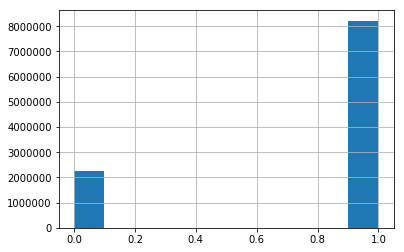

In [110]:

pixelsFrame["solved Cat"].hist()